# Finance Data Project 
##### AUTHOR :  UTHMAN OLAGOKE
The aim of this data project is to focus on the exploratory data analysis(EDA) of stock prices between 2006 to 2016. The focus is on the bank stocks to see how they progressed throughout the financial crisis all the way form jan 2006,to early 2016.


# Getting required imports

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

# Getting the data
*  Bank of America = BAC
* CitiGroup = C
* Goldman Sachs = GS
* JPMorgan Chase = JPM
* Morgan Stanley = MS
* Wells Fargo = WFC

In [4]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

##### Creating  a tickers symbols list as string

In [5]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Using pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks and Setting the keys argument to the tickers list

In [7]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)
bank_stocks.head(5)

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  33.584072   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  33.227406   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  33.270203   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  33.220257   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  33.241661   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   

                                                   WFC                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  35.558945  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  35.583344  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  35.680943  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  35.717522  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  36.095604  31.825001  31.555000  31.674999   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  20.242819  
2006-01-04  31.530001  10870000.0  20.008030  
2006-01-05  31.495001  10158000.0  19.985825  
2006-01-06  31.680000   8403800.0  20.103212  
2006-01-09  31.674999   5619600.0  20.100046  

[5 rows x 36 columns]

### setting column name levels (bank tickers and stock info)

In [8]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [9]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   33.584072  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.227406  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.270203  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.220257  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.241661  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  35.558945  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  35.583344  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  35.680943  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  35.717522  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  36.095604  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.242819  
2006-01-04   31.799999  31.530001  10870000.0  20.008030  
2006-01-05   31.500000  31.495001  10158000.0  19.985825  
2006-01-06   31.580000  31.680000   8403800.0  20.103212  
2006-01-09   31.674999  31.674999   5619600.0  20.100046  

[5 rows x 36 columns]

## Exploratory Data Analysis(EDA)
##### Getting the maximum closing price for the bank stocks 

In [10]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

** Creating a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [11]:
returns = pd.DataFrame()

** using  pandas pct_change() method on the Close column to create a column representing this return value. Creating a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns dataFrame.**

In [12]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


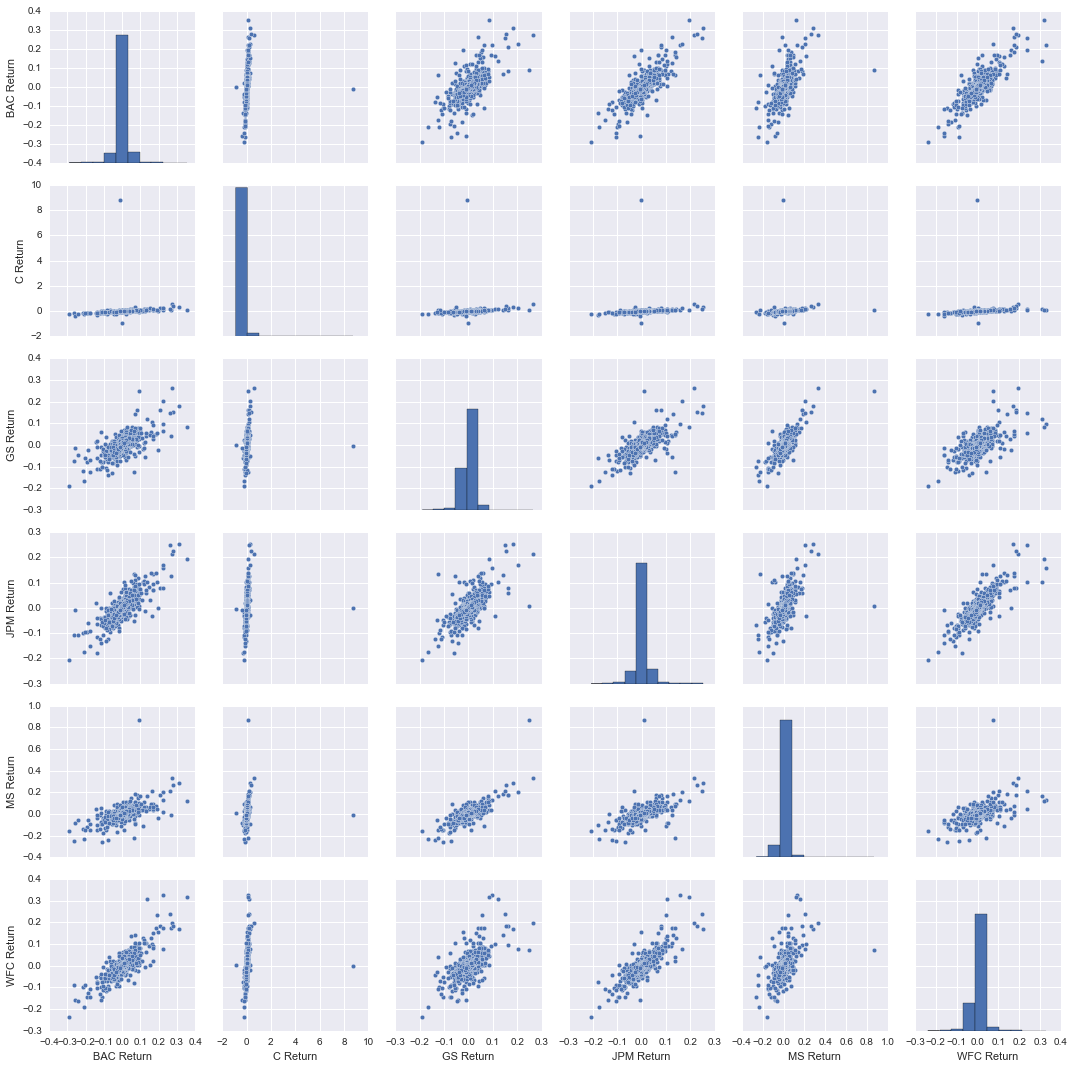

In [13]:
sns.pairplot(returns[1:])

In [18]:
returns.idxmin()
# Dates with the lowest returns

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [19]:
returns.idxmax()
# Dates with the highest returns

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [20]:
returns.std()

#Getting the standard deviation of the returns to know the riskiest  

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

Citigroup is the riskiest

In [24]:
returns.loc['2015-01-01':'2015-12-31'].std()
# riskiest in 2015

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

<AxesSubplot:xlabel='MS Return', ylabel='Count'>

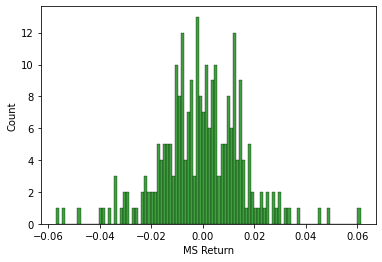

In [26]:
sns.histplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)

#####  Seaborn histplot  showing morgan stanley's return for 2015

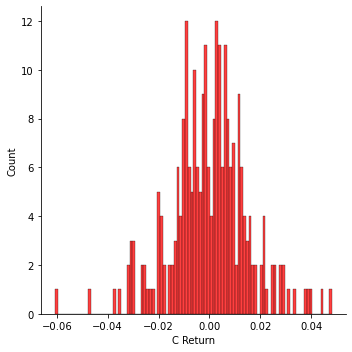

In [34]:
sns.displot(returns.loc['2015-01-01':'2015-12-31']['C Return'],color='red',bins=100)

#####  seaborn  distplot showing  the 2015 returns for CitiGroup **

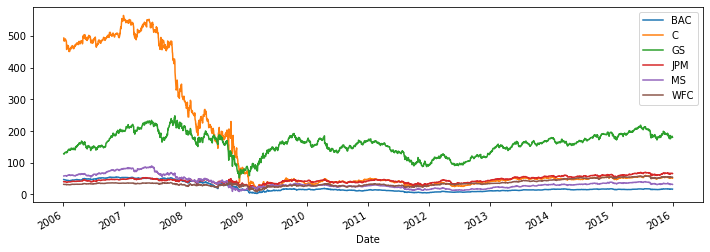

In [35]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

##### A line plot showing Close price for each bank between 2006 - 2016.

<AxesSubplot:xlabel='Date'>

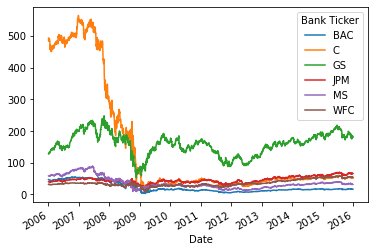

In [36]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [37]:
# using plotly to create more interactive plot
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages





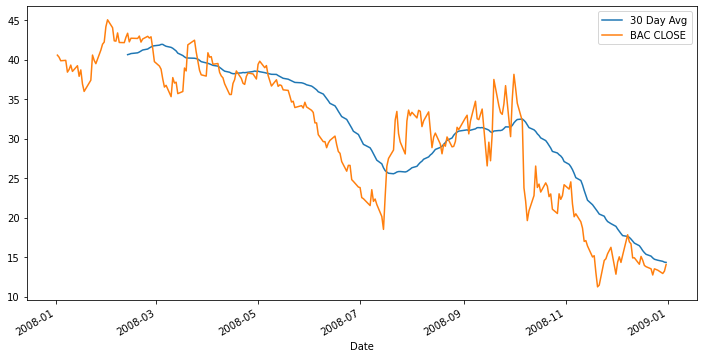

In [39]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

##### Plotting the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

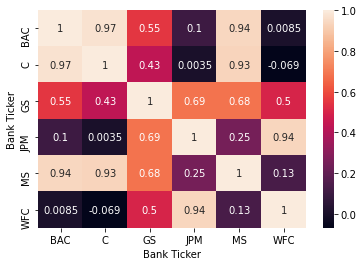

In [40]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

** A heatmap  of the correlation between the stocks Close Price.**

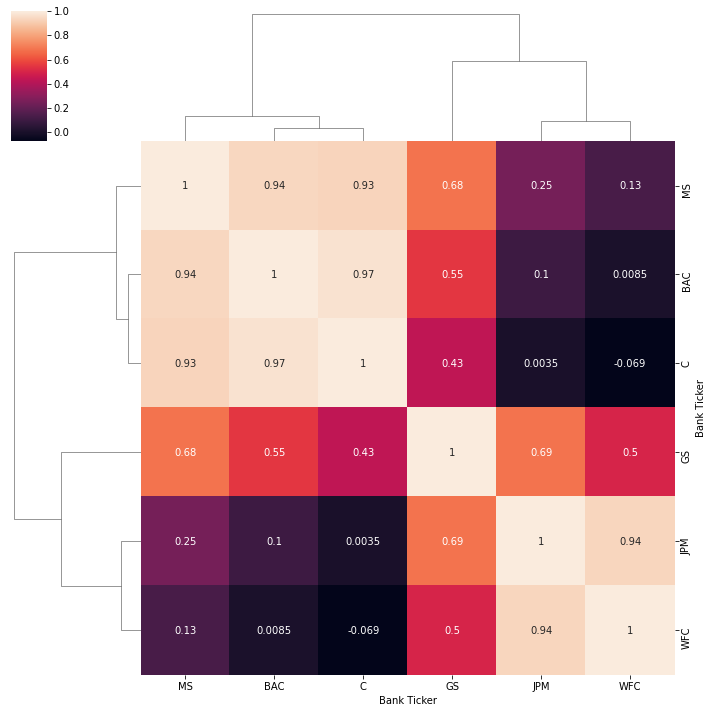

In [41]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

##### A clustermap to cluster the correlations together

In [13]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')
# A  plotly heatmap   

In [14]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

##### Using .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [15]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

##### Using .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [16]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')

##### Using .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

# Thank You !
